In [146]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
a = 50
b = 120

domain = np.linspace(0, 9, 1000)
f = lambda t : np.sin(2*np.pi*a*t) + np.sin(2*np.pi*b*t)
y = f(domain)
x = domain

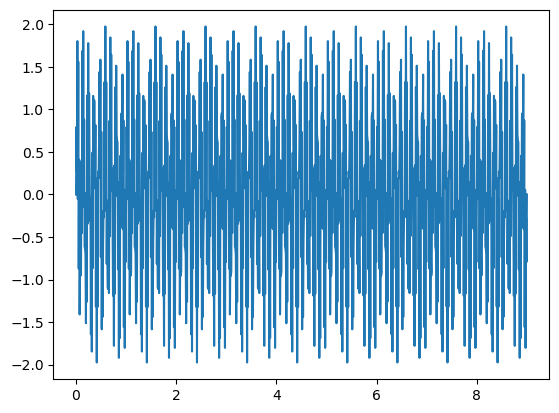

In [148]:
plt.plot(x, y)

c:\Users\Admin\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


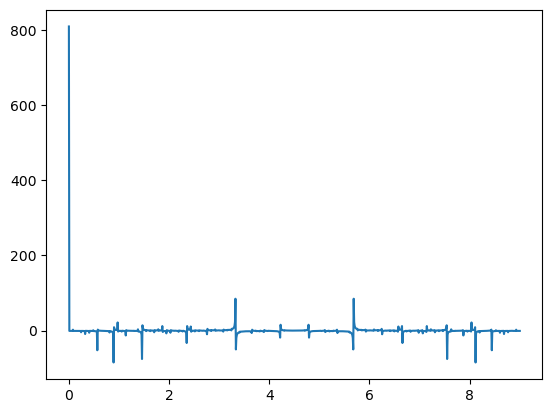

In [149]:
yf = np.power(sp.fft.fft(np.abs(np.array(y))), 1)
xf = sp.fft.fftfreq(y.size)
plt.plot(x, yf)

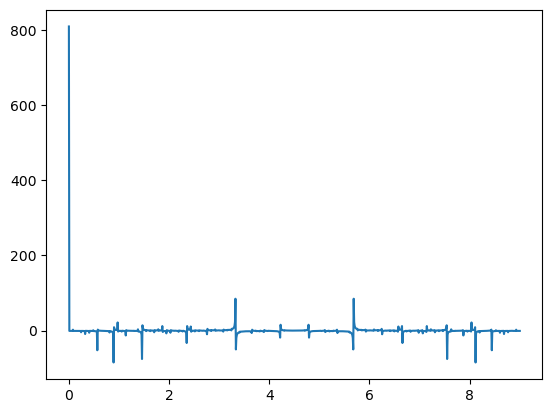

In [150]:
a = 50
b = 120

domain = np.linspace(0, 9, 1000)
f = lambda t : np.sin(2*np.pi*a*t) + np.sin(2*np.pi*b*t)
y = f(domain)
x = domain
yf = np.power(sp.fft.fft(np.abs(np.array(y))), 1)
xf = sp.fft.fftfreq(y.size)
plt.plot(x, yf)

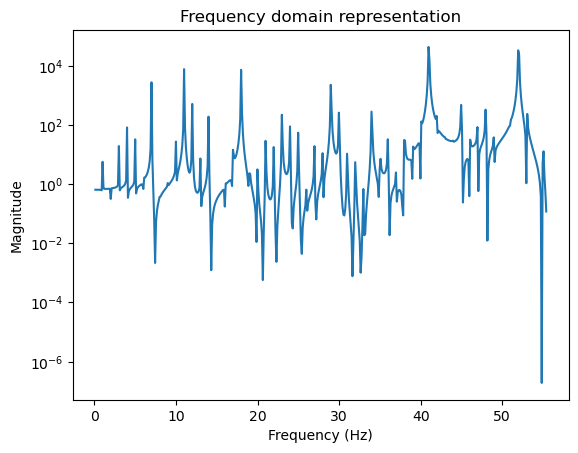

In [151]:
import numpy as np
import matplotlib.pyplot as plt

a = 50
b = 120

domain = np.linspace(0, 9, 1000)
f = lambda t : np.sin(2*np.pi*a*t) + np.sin(2*np.pi*b*t)
y = f(domain)
x = domain

# Compute the FFT
yf = np.power(sp.fft.fft(np.abs(np.array(y))), 2)
# xf = sp.fft.fftfreq(yf.size)
xf = sp.fft.fftfreq(y.size, domain[1] - domain[0])

# Only use the positive frequencies
positive_freqs = xf > 0
plt.plot(xf[positive_freqs], np.abs(yf)[positive_freqs])
plt.yscale("log")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency domain representation')
plt.show()


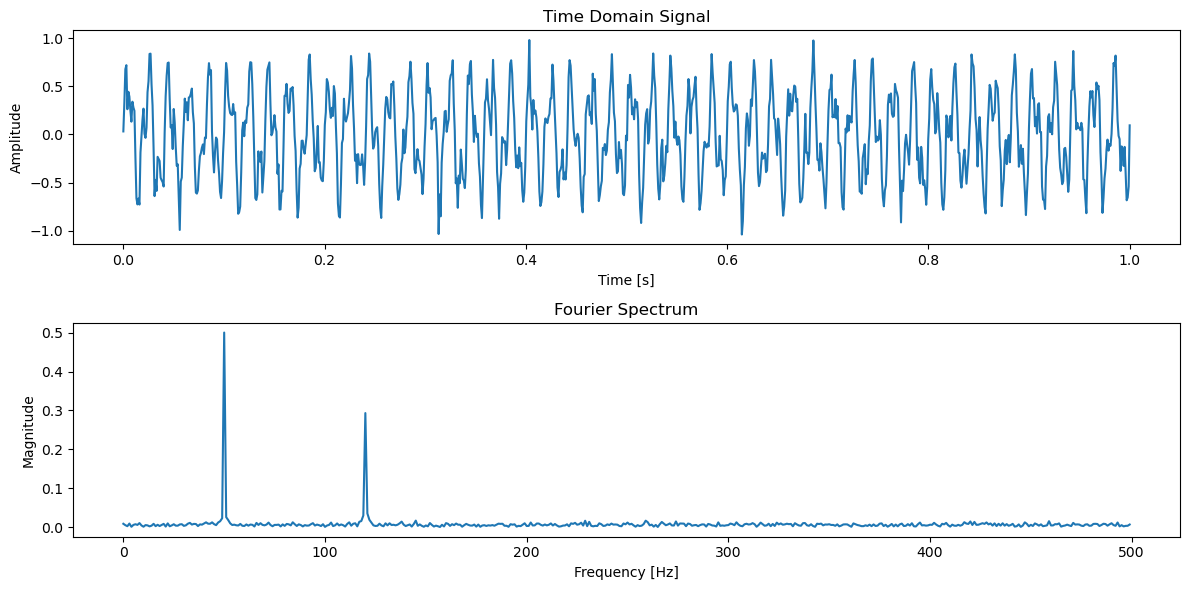

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal: a sum of two sine waves with noise
sampling_rate = 1000  # Sampling rate in Hz
T = 1.0 / sampling_rate  # Sampling interval
t = np.linspace(0.0, 1.0, sampling_rate)  # Time vector

# Signal parameters
f1 = 50  # Frequency of the first sine wave in Hz
f2 = 120  # Frequency of the second sine wave in Hz

# Generate the signal
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t) + 0.1 * np.random.randn(t.size)

# Compute the Fourier Transform using FFT
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(t.size, T)

# Take the magnitude of the FFT and keep only the positive frequencies
fft_magnitude = 2.0 / t.size * np.abs(fft_result[:t.size // 2])
fft_freqs = fft_freqs[:t.size // 2]

# Plot the signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the Fourier Spectrum
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, fft_magnitude)
plt.title('Fourier Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


In [153]:
import random

def generate_samples(
    x,
    y,
    num_samples=1000,
    noise_std=1,
):
    samples = []
    ffts = []
    for i in range(num_samples):
        noisy = y + np.random.normal(0, noise_std, y.shape[0])
        samples.append(noisy)
        fft_res = sp.fft.fft(noisy.values)
        tmp = 2.0 / t.size * np.abs(fft_res[:t.size // 2])
        ffts.append(tmp)
    return np.array(samples), np.array(ffts)


def random_color_hex():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return '#{0:02x}{1:02x}{2:02x}'.format(r, g, b)


def plot_samples(
    samples,
    x,
    num=5,
):
    elements = np.random.choice(samples.shape[0], size=num, replace=False)
    ys = samples[elements, :]
    # print(f'{ys.shape=}')
    # print(f'{ys[0]=}')
    plt.figure(figsize=(15, 5))
    for sample in ys:
        plt.plot(x, sample, color=random_color_hex())
        
    plt.show()
    # st.pyplot()
    
    



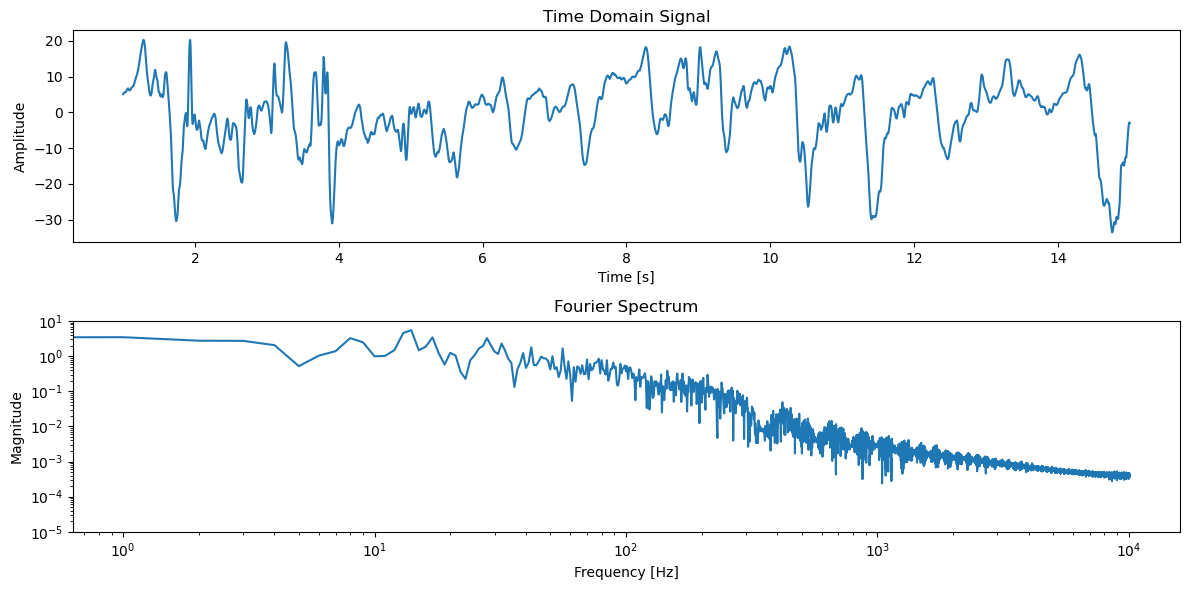

In [154]:
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../pages/app_data/current_data.csv')
t = data.x
signal = data.y

# Generate a sample signal: a sum of two sine waves with noise
sampling_rate = len(t)  # Sampling rate in Hz
T = 1.0 / sampling_rate  # Sampling interval

# Compute the Fourier Transform using FFT
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(t.size, T)

# Take the magnitude of the FFT and keep only the positive frequencies
fft_magnitude = 2.0 / t.size * np.abs(fft_result[:t.size // 2])
fft_freqs = fft_freqs[:t.size // 2]

# Plot the signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the Fourier Spectrum
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, fft_magnitude)
plt.title('Fourier Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()


In [167]:
def plot_confidence_intervals(
    samples,
    x,
    original_fft=None,
):
    means = np.mean(np.abs(samples), axis=0)
    print(f'{means.shape=}')
    plt.plot(x, means)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    stds = np.std(np.abs(samples), axis=0)
    lower = means - 1.96 * stds
    upper = means + 1.96 * stds    
    plt.figure(figsize=(15, 5))
    plt.plot(x, np.full(x.shape, np.quantile(means, 0.95)), label='95% Threshold', color='red', linestyle='--')
    plt.fill_between(x, np.abs(lower), np.abs(upper), label='$\pm 1.96 \sigma$', color='violet', alpha=0.3)
    # plt.plot(x, upper, label='upp', color='violet')
    # plt.plot(x, np.abs(means), label='Mean Amplitude')

    
    if (original_fft is not None):
        plt.plot(x, np.abs(original_fft), color='blue', label='Original')
    
    plt.legend()
    plt.grid()
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    # st.pyplot()

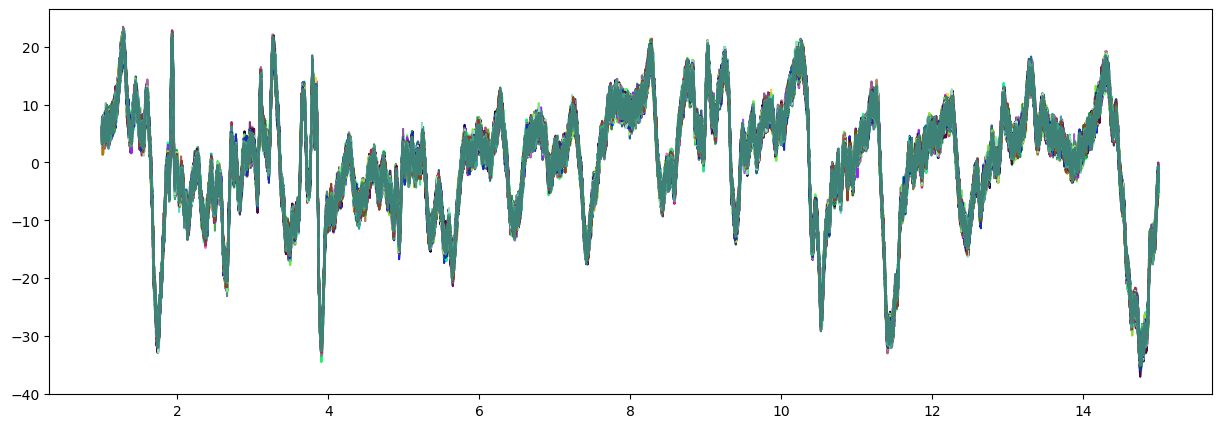

fft_freqs.shape = (10080,), fft_magnitude.shape = (10080,)
means.shape=(10080,)


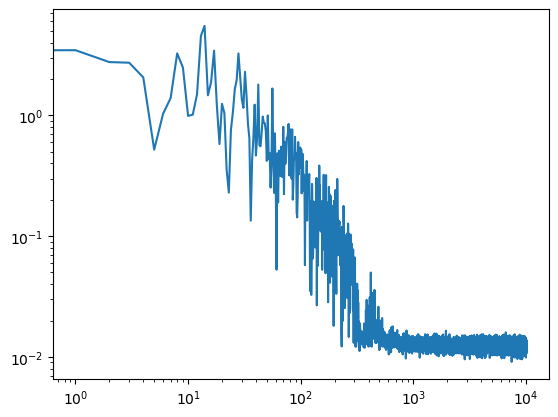

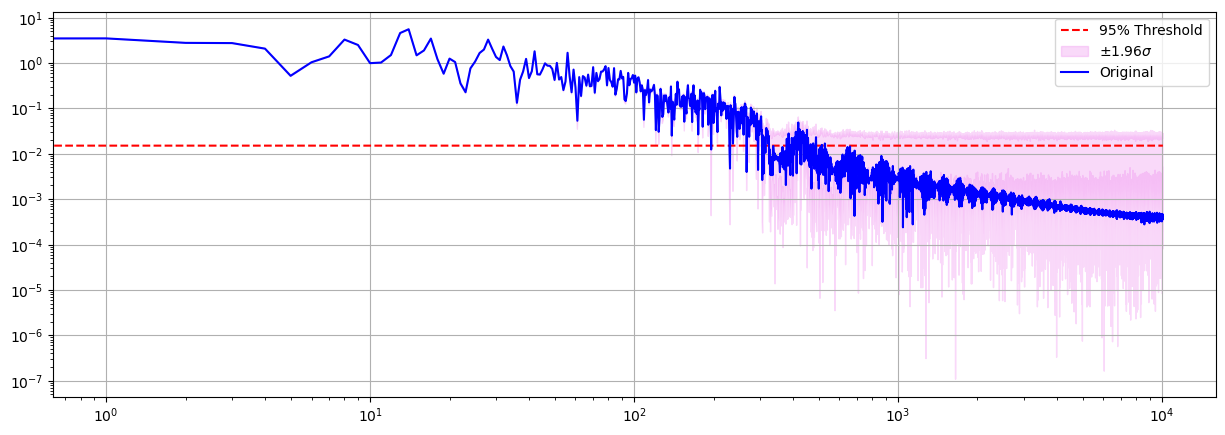

In [168]:
samples, ffts = generate_samples(data.x, data.y, 50, 1)
plot_samples(samples=samples, x=data.x, num=50)
print(f'{fft_freqs.shape = }, {fft_magnitude.shape = }')
plot_confidence_intervals(ffts, fft_freqs, fft_magnitude)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters
# t = np.arange(0, 0.6, 0.001)
# x = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 12 * t)
# X = np.fft.fft(x)
# power_spectrum = np.abs(X) ** 2
# num_iterations = 1000
# monte_carlo_power = np.zeros(power_spectrum.shape)

# # Monte Carlo simulation
# for i in range(num_iterations):
#     noise = np.random.randn(*x.shape)
#     noisy_signal = x + noise
#     noisy_X = np.fft.fft(noisy_signal)
#     noisy_power_spectrum = np.abs(noisy_X) ** 2
#     monte_carlo_power += noisy_power_spectrum

# # Average the results
# monte_carlo_power /= num_iterations

# # Calculate the 95th percentile threshold
# threshold = np.quantile(monte_carlo_power, 0.95)

# # Frequency axis
# f = np.linspace(0, 1 / (2 * (t[1] - t[0])), len(t) // 2 + 1)

# # Plot the results
# plt.semilogy(f, monte_carlo_power[:len(f)], label='Power Spectrum')
# plt.plot([f[0], f[-1]], [threshold, threshold], 'r--', label='95% Threshold')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Spectral Power (dB)')
# plt.title('Power Spectrum with Threshold (Monte Carlo Method)')
# plt.legend()
# plt.show()
